# 7.3.1 Basic CNN

## Explanation of Basic CNN Architectures
Convolutional Neural Networks (CNNs) are a class of deep learning models specifically designed for processing structured grid data, such as images. A basic CNN architecture consists of several layers, including convolutional layers, pooling layers, and fully connected layers.

1. **Convolutional Layer**: This layer applies a set of filters to the input image, creating feature maps that capture various features such as edges, textures, and patterns. The filters slide over the image, performing convolution operations, and the resulting feature maps are passed to the next layer.

2. **Activation Function**: Typically, the Rectified Linear Unit (ReLU) function is applied to the output of the convolutional layer to introduce non-linearity. This helps the network learn more complex patterns.

3. **Pooling Layer**: This layer performs down-sampling operations, such as max pooling, to reduce the spatial dimensions of the feature maps. This helps in reducing the computational complexity and makes the network more robust to small translations in the input.

4. **Fully Connected Layer**: After several convolutional and pooling layers, the high-level feature maps are flattened into a vector and passed through one or more fully connected layers. These layers perform classification based on the extracted features.

5. **Output Layer**: The final layer typically uses a softmax activation function to output class probabilities for classification tasks.

___
___
### Readings:
- [A Basic Introduction to Convolutional Neural Network](https://medium.com/@himadrisankarchatterjee/a-basic-introduction-to-convolutional-neural-network-8e39019b27c4)
- [Basics of the Classic CNN](https://towardsdatascience.com/basics-of-the-classic-cnn-a3dce1225add)
- [A Simple CNN Model Beginner Guide - Kaggle](https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide)
- [Convolutional Neural Networks (CNNs / ConvNets)](https://cs231n.github.io/convolutional-networks/)
- [Basics of CNN in Deep Learning](https://www.analyticsvidhya.com/blog/2022/03/basics-of-cnn-in-deep-learning/)
- [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)
- [Demystifying the Mathematics Behind Convolutional Neural Networks (CNNs)](https://www.analyticsvidhya.com/blog/2020/02/mathematics-behind-convolutional-neural-network/)
- [Convolutional Neural Network in plain NumPy](https://towardsdatascience.com/lets-code-convolutional-neural-network-in-plain-numpy-ce48e732f5d5)
___
___

## Applications of CNNs in Various Domains
CNNs are widely used in various domains due to their effectiveness in capturing spatial hierarchies in data. Some notable applications include:
- **Image Classification**: Classifying objects within images (e.g., identifying different species of animals).
- **Object Detection**: Detecting and localizing objects within images (e.g., autonomous driving).
- **Semantic Segmentation**: Classifying each pixel in an image (e.g., medical imaging for tumor detection).
- **Natural Language Processing**: Sentence classification, language translation, and sentiment analysis.
- **Video Analysis**: Action recognition and video classification.

## Methods for Implementing Basic CNNs
Implementing a basic CNN can be done using various deep learning libraries such as TensorFlow, Keras, and PyTorch. These libraries provide high-level APIs to define, train, and evaluate CNN models with minimal code. Here, we will demonstrate the implementation of a basic CNN using TensorFlow/Keras.

- ### Preparing the data

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Shape of X_train : (60000, 28, 28, 1)
Shape of X_test : (10000, 28, 28, 1)


- ### Define the CNN model

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

- ### Compile, Train and Evaluate the CNN model

In [3]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.8162 - loss: 0.5584 - val_accuracy: 0.9846 - val_loss: 0.0501
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9771 - loss: 0.0774 - val_accuracy: 0.9900 - val_loss: 0.0301
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9844 - loss: 0.0514 - val_accuracy: 0.9886 - val_loss: 0.0344
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9873 - loss: 0.0421 - val_accuracy: 0.9887 - val_loss: 0.0341
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9888 - loss: 0.0376 - val_accuracy: 0.9939 - val_loss: 0.0200
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9915 - loss: 0.0286 - val_accuracy: 0.9941 - val_loss: 0.0204
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9929 - loss: 0.0237 - val_accuracy: 0.9923 - val_loss: 0.0243
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9938 - loss: 0.0213 - 

In [4]:
# Make predictions on the test set
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


- ### Visualise the results of the CNN model

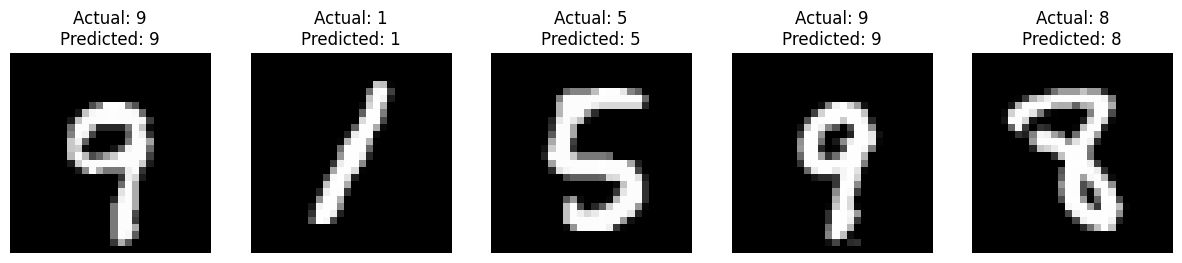

In [5]:
# Display some predictions with actual images
import numpy as np
import matplotlib.pyplot as plt

# Map numeric labels to class names (for MNIST, they are just the digits 0-9)
class_names = [str(i) for i in range(10)]

# Select a few random test images
num_images = 5
random_indices = np.random.choice(len(X_test), num_images, replace=False)
random_images = X_test[random_indices]
random_labels = y_test[random_indices]
random_predictions = predictions[random_indices]

# Plot the selected test images with their actual and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(random_images[i].reshape(28, 28), cmap='gray')
    actual_label = class_names[np.argmax(random_labels[i])]
    predicted_label = class_names[np.argmax(random_predictions[i])]
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')
plt.show()

## Conclusion

In this section, we explored the fundamentals of Convolutional Neural Networks (CNNs), including their architecture and common components such as convolutional layers, activation functions, pooling layers, fully connected layers, and output layers. We also discussed the diverse applications of CNNs across various domains, highlighting their effectiveness in tasks such as image classification, object detection, semantic segmentation, natural language processing, and video analysis. By understanding the basic structure and functionality of CNNs, we can better appreciate their power and versatility in solving complex problems. In the following sections, we will delve deeper into advanced CNN architectures and their specific implementations.
